# `matplotlib` line chart tweaks

## Imports

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

## Data

In [18]:
df = pd.read_csv(
    f"../data/google_trends_data_related_roles.csv",
    parse_dates=["Date"],
    index_col=["Date"])

In [19]:
df.shape

(124, 4)

In [20]:
df.head()

,Data Science,Data Analysis,Machine Learning,Data Engineering
Date,,,,
2013-01-01,2,20,9,2
2013-02-01,2,23,9,2
2013-03-01,2,23,9,2
2013-04-01,4,26,10,2
2013-05-01,3,24,10,2


In [21]:
df.tail()

,Data Science,Data Analysis,Machine Learning,Data Engineering
Date,,,,
2022-12-01,69,81,86,7
2023-01-01,78,91,93,8
2023-02-01,79,100,95,8
2023-03-01,77,98,91,8
2023-04-01,75,94,89,8


## Default Line Plot

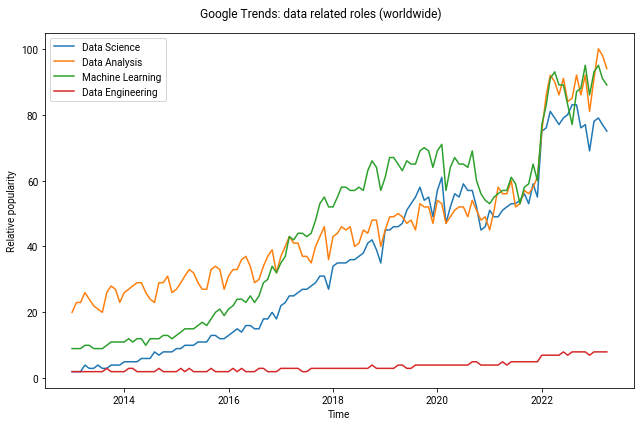

In [22]:
fig, ax = plt.subplots(
    figsize=(9,6),
    facecolor="white"
)
fig.suptitle(
    "Google Trends: data related roles (worldwide)"
)


for column in df:
    ax.plot(
        df[column],
        label=column
    )

# Set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Relative popularity")

ax.legend()

plt.tight_layout()

plt.savefig(
    fname="plot1.png",
    format="png",
    dpi=125
);

## Tweak 1

* set axis limits
  * I've set the start and end date for `x-axis` to be 3 months before/after the dates in data
* set axis tick marks
* remove spines
* remove legend
* add series name as a text annotations

It's worth noting that I've only set the `xlim` values in this case but the `x` tick seem to be set by `matplotlib` as I want them (at annual interval) so no further adjustment is needed.

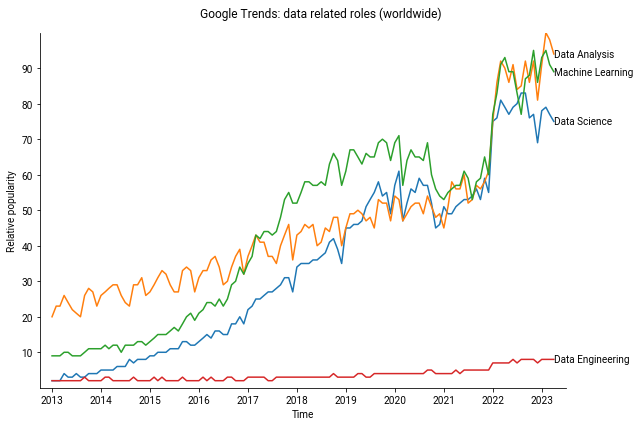

In [23]:
fig, ax = plt.subplots(
    figsize=(9,6),
    facecolor="white"
)
fig.suptitle(
    "Google Trends: data related roles (worldwide)"
)


for column in df:
    # Plot lines
    ax.plot(
        df[column],
        label=column
    )

    # Add labels
    ax.text(
        df.index[-1], df[column][-1],
        f"{column}",
        ha="left",
        va="center"
    )

# Set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Relative popularity")

# Set axis limits
ax.set_ylim(0, 100)
ax.set_xlim(
    pd.Timestamp(
        year=2012,
        month=10,
        day=1
        ),
    pd.Timestamp(
        year=2023,
        month=7,
        day=1
        )
)

# Set "y" tick marks
ax.set_yticks(list(range(0, 110, 10)[1:-1]))

# Remove spines
for position in ["top", "right"]:
    ax.spines[position].set_visible(False)

plt.tight_layout()

plt.savefig(
    fname="plot2.png",
    format="png",
    dpi=125
);

## Tweak 2

* update colours
  * of the line
  * of the text (title and labels)
* update font face and size
* add a small offset to data labels (30 days) so it doesn't touch the lines

### Install preffered font: `San-Serif` fonts are recommended for the plots as they are easy to read

I went for **Roboto** font which is available in [Google Fonts](https://fonts.google.com/specimen/Roboto?query=rob&category=Sans+Serif).  

The colours I use come from the [GNOME colour palette](https://developer.gnome.org/hig/reference/palette.html).

In [24]:
# Import font manager

from matplotlib import font_manager

In [25]:
# Check if Matplotlib sees your font of choice
font_manager.get_font_names()

['Harlow Solid Italic',
 'Franklin Gothic Medium Cond',
 'Lucida Sans Unicode',
 'Franklin Gothic Book',
 'Parchment',
 'Poor Richard',
 'Land Rover Wide',
 'Onyx',
 'Ink Free',
 'Old English Text MT',
 'Garamond',
 'Eras Bold ITC',
 'Bell MT',
 'Kristen ITC',
 'Freestyle Script',
 'Californian FB',
 'Stencil',
 'Perpetua',
 'cmex10',
 'Franklin Gothic Heavy',
 'Microsoft JhengHei',
 'Cambria',
 'STIXGeneral',
 'Microsoft Uighur',
 'MT Extra',
 'Maiandra GD',
 'Bradley Hand ITC',
 'STIXSizeFiveSym',
 'Palace Script MT',
 'Broadway',
 'Algerian',
 'Wide Latin',
 'DejaVu Serif Display',
 'Segoe MDL2 Assets',
 'Informal Roman',
 'DejaVu Sans Display',
 'Rage Italic',
 'French Script MT',
 'Century Gothic',
 'Franklin Gothic Demi',
 'Blackadder ITC',
 'Lucida Console',
 'Consolas',
 'STIXNonUnicode',
 'Wingdings 3',
 'Trebuchet MS',
 'Mistral',
 'Bahnschrift',
 'Lucida Handwriting',
 'Gill Sans MT Ext Condensed Bold',
 'Snap ITC',
 'MV Boli',
 'Niagara Solid',
 'Bauhaus 93',
 'Lucida Sans 

In [ ]:
# You can check all the fonts from the system folder
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [26]:
# And add them so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

### Plot settings

In [27]:
plt.rcParams["font.family"] = "Roboto"  # update font for the whole plot
my_colours = {
    "orange 3": "#ff7800",
    "green 3": "#33d17a",
    "blue 3": "#3584e4",
    "red 3": "#e01b24"
}
text_colour = "#5e5c64"  # dark 2

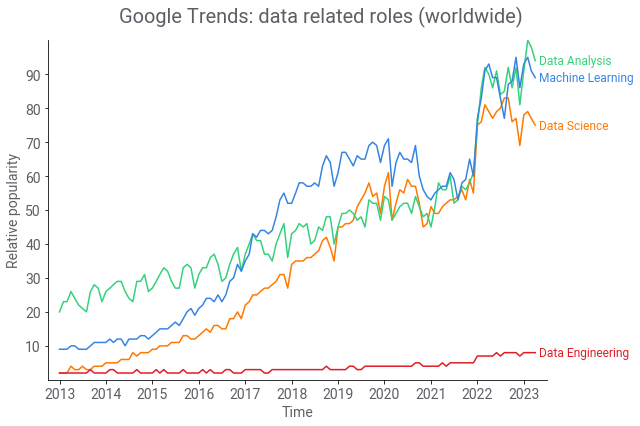

In [28]:
fig, ax = plt.subplots(
    figsize=(9,6),
    facecolor="white"
)
fig.suptitle(
    "Google Trends: data related roles (worldwide)",
    fontsize=20,
    color=text_colour
)


for column, colour in zip(df, my_colours):
    # Plot lines
    ax.plot(
        df[column],
        label=column,
        color=my_colours[colour]
    )

    # Add labels
    ax.text(
        df.index[-1] + pd.Timedelta(30, "d"), df[column][-1],  # x, y
        f"{column}",
        va="center",
        fontsize=12,
        color=my_colours[colour]
    )

# Set axis labels
ax.set_xlabel(
    "Time",
    fontsize=14,
    color=text_colour
)
ax.set_ylabel(
    "Relative popularity",
    fontsize=14,
    color=text_colour
)

# Set axis limits
ax.set_ylim(0, 100)
ax.set_xlim(
    pd.Timestamp(
        year=2012,
        month=10,
        day=1
        ),
    pd.Timestamp(
        year=2023,
        month=7,
        day=1
        )
)

# Set "y" tick marks
ax.set_yticks(list(range(0, 110, 10)[1:-1]))

# Remove spines
for position in ["top", "right"]:
    ax.spines[position].set_visible(False)

# Update apperance of the `x` axis tick labels
ax.tick_params(
    axis="both",
    labelsize=14,
    labelcolor=text_colour
)

plt.tight_layout()

plt.savefig(
    fname="plot3.png",
    format="png",
    dpi=125
);

## Tweak 3: story telling

* highlight one important information and grey out the rest (keep it as a context)

I've picked up "Data Analysis" column as the "highlight". I want to plot it as the last one so it's on top of everything else.  
There are two ways to achieve it:
* change the `z-order` of the line
* re-arange the columns so the "Data Analysis" gets plotted as the last one

In [29]:
df.columns

Index(['Data Science', 'Data Analysis', 'Machine Learning',
       'Data Engineering'],
      dtype='object')

In [30]:
# change order of the columns
df = df[
    ['Data Science', 'Machine Learning', 'Data Engineering', 'Data Analysis']
]

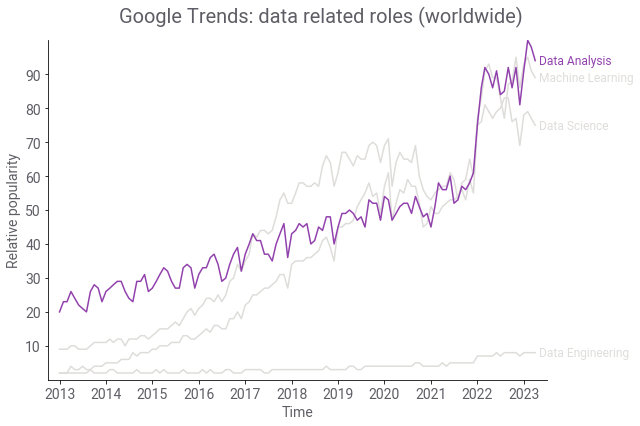

In [31]:
fig, ax = plt.subplots(
    figsize=(9,6),
    facecolor="white"
)
fig.suptitle(
    "Google Trends: data related roles (worldwide)",
    fontsize=20,
    color=text_colour
)


for column in df:
    if column == "Data Analysis":
        my_colour = "#9141ac"  # purple 3
    else:
        my_colour = "#deddda"  # light 33


    # Plot lines
    ax.plot(
        df[column],
        label=column,
        color=my_colour
    )

    # Add labels
    ax.text(
        df.index[-1] + pd.Timedelta(30, "d"), df[column][-1],  # x, y
        f"{column}",
        va="center",
        fontsize=12,
        color=my_colour
    )

# Set axis labels
ax.set_xlabel(
    "Time",
    fontsize=14,
    color=text_colour
)
ax.set_ylabel(
    "Relative popularity",
    fontsize=14,
    color=text_colour
)

# Set axis limits
ax.set_ylim(0, 100)
ax.set_xlim(
    pd.Timestamp(
        year=2012,
        month=10,
        day=1
        ),
    pd.Timestamp(
        year=2023,
        month=7,
        day=1
        )
)

# Set "y" tick marks
ax.set_yticks(list(range(0, 110, 10)[1:-1]))

# Remove spines
for position in ["top", "right"]:
    ax.spines[position].set_visible(False)

# Update apperance of the `x` axis tick labels
ax.tick_params(
    axis="both",
    labelsize=14,
    labelcolor=text_colour
)

plt.tight_layout()

plt.savefig(
    fname="plot4.png",
    format="png",
    dpi=125
);